In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_KnitTops2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Knit Tops'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 371 ms, sys: 141 ms, total: 512 ms
Wall time: 8.9 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [9]:
DF['N_KNITTOPS2018'].fillna(0,inplace=True)

In [7]:
DF4 = DF[DF.DEPARTMENT_NAME=='Knit Tops']
X = ['%s_2017'%x for x in DF4.columns[2:-1]]
X.insert(0,'ILINK')
X.insert(1,'DEPARTMENT_NAME')
X.insert(42,'N_KNITTOPS2018')
DF4.columns = X
print 'Distinct # of Customers in who purchased Knit Tops in 2017:',DF4.shape[0]

Distinct # of Customers in who purchased Knit Tops in 2017: 72152


In [8]:
NUMERIC_FTS = ['TOTAL_BOUGHT_2017',
             'SHIPPED_SOLD_AMT_2017',
             'AVG_SHIPPED_SOLD_AMT_2017',
             'STD_SHIPPED_SOLD_AMT_2017',
             'VAR_SHIPPED_SOLD_AMT_2017',
             'DISCOUNT_2017',
             'AVG_DISCOUNT_2017',
             'STD_DISCOUNT_2017',
             'VAR_DISCOUNT_2017',
             'N_KNITTOPS2018']
CATEG_FTS = ['ENDUSE_HAS_CORE_2017',
             'ENDUSE_HAS_WEAREVER_2017',
             'ENDUSE_HAS_PUREJILL_2017',
             'PAYTYPE_HAS_JJC_2017',
             'PAYTYPE_HAS_VISA_2017',
             'PAYTYPE_HAS_MC_2017',
             'PAYTYPE_HAS_AMEX_2017',
             'PAYTYPE_HAS_DISC_2017',
             'PAYTYPE_HAS_DEBIT_2017',
             'PAYTYPE_HAS_CASH_2017',
             'PAYTYPE_HAS_CK_2017',
             'PAYTYPE_HAS_OTHER_2017',
             'FABRICCATEGORY_HAS_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_HAS_LINEN/LINENBL_2017',
             'ENDUSE_%_CORE_2017',
             'ENDUSE_%_WEAREVER_2017',
             'ENDUSE_%_PUREJILL_2017',
             'PAYTYPE_%_JJC_2017',
             'PAYTYPE_%_VISA_2017',
             'PAYTYPE_%_MC_2017',
             'PAYTYPE_%_AMEX_2017',
             'PAYTYPE_%_DISC_2017',
             'PAYTYPE_%_DEBIT_2017',
             'PAYTYPE_%_CASH_2017',
             'PAYTYPE_%_CK_2017',
             'PAYTYPE_%_OTHER_2017',
             'FABRICCATEGORY_%_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_%_LINEN/LINENBL_2017','N_KNITTOPS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Knit Tops Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT_2017,N_KNITTOPS2018
TOTAL_BOUGHT_2017,1.000000,0.597052
N_KNITTOPS2018,0.597052,1.000000


/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


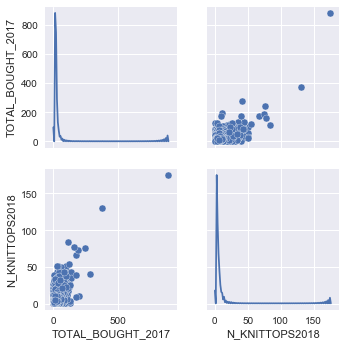

In [10]:
fts = [NUMERIC_FTS[0]]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,N_KNITTOPS2018
SHIPPED_SOLD_AMT_2017,1.000000,0.109661,0.195933,0.096605,0.585391
AVG_SHIPPED_SOLD_AMT_2017,0.109661,1.000000,0.232938,0.209310,-0.027132
STD_SHIPPED_SOLD_AMT_2017,0.195933,0.232938,1.000000,0.918963,0.040939
VAR_SHIPPED_SOLD_AMT_2017,0.096605,0.209310,0.918963,1.000000,0.002186
N_KNITTOPS2018,0.585391,-0.027132,0.040939,0.002186,1.000000


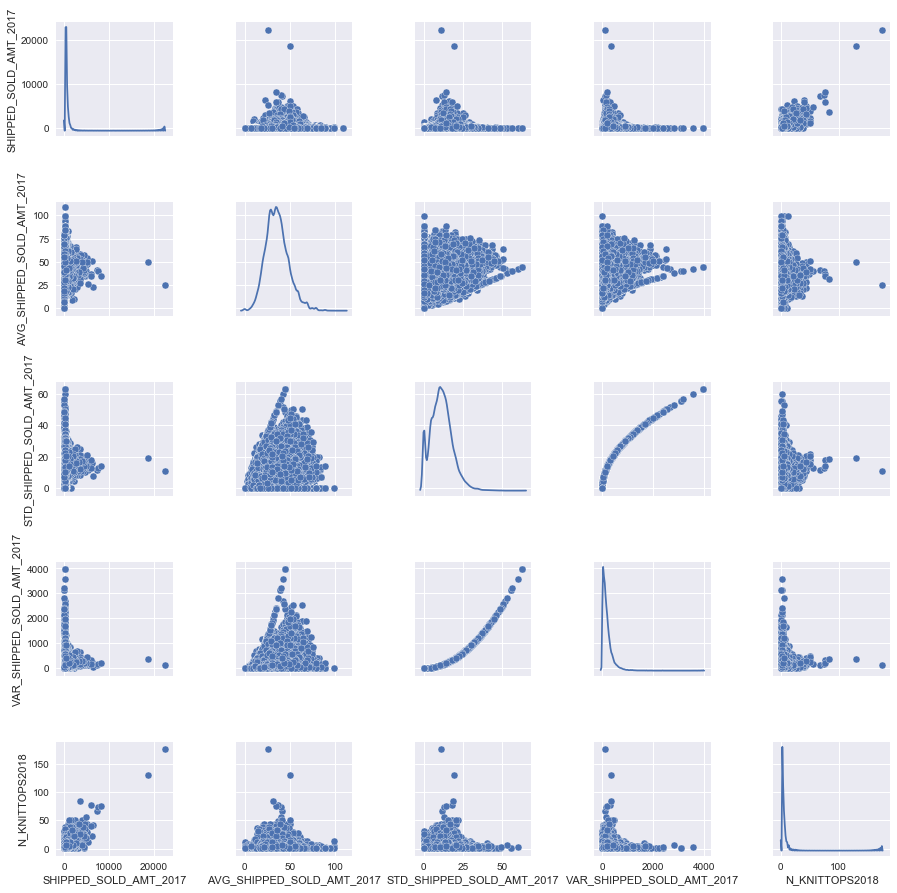

In [11]:
fts = NUMERIC_FTS[1:5]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,N_KNITTOPS2018
DISCOUNT_2017,1.000000,0.185762,0.173631,0.081065,0.573228
AVG_DISCOUNT_2017,0.185762,1.000000,0.125408,0.095863,0.033826
STD_DISCOUNT_2017,0.173631,0.125408,1.000000,0.920055,0.058459
VAR_DISCOUNT_2017,0.081065,0.095863,0.920055,1.000000,0.016337
N_KNITTOPS2018,0.573228,0.033826,0.058459,0.016337,1.000000


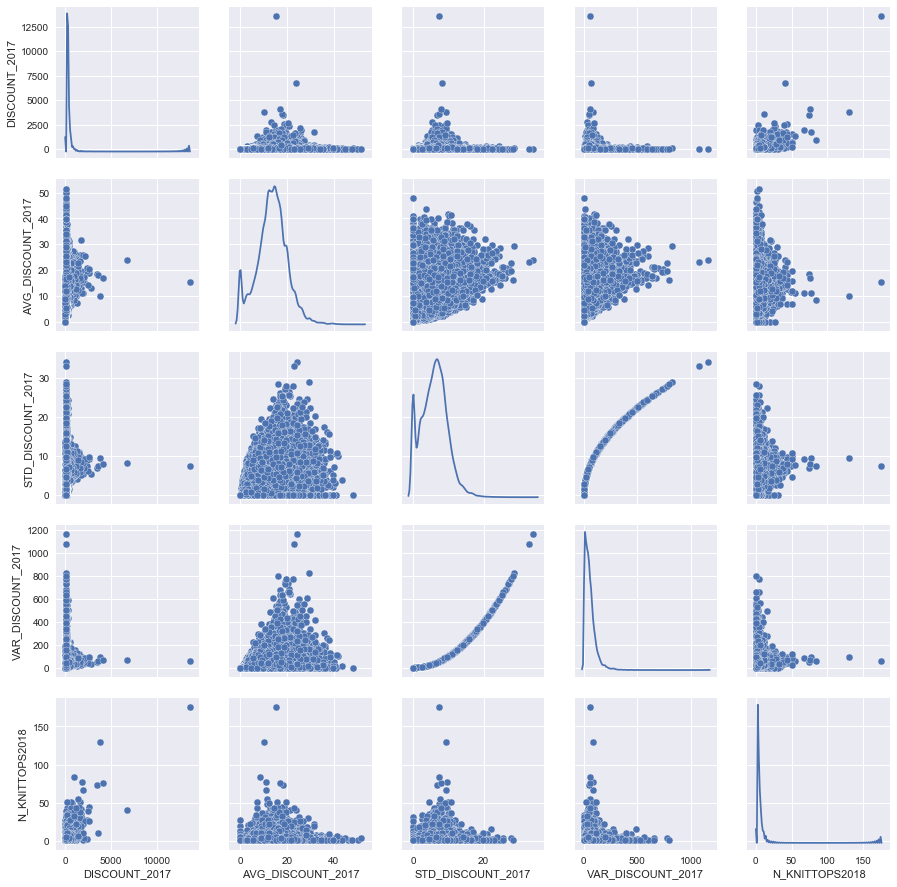

In [12]:
fts = NUMERIC_FTS[5:]
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

In [13]:
#fts = CATEG_FTS[0:3]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [14]:
#fts = CATEG_FTS[3:6]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [15]:
#fts = CATEG_FTS[6:9]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [16]:
#fts = CATEG_FTS[9:12]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [17]:
#fts = CATEG_FTS[12:15]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#g = sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,N_KNITTOPS2018
ENDUSE_%_CORE_2017,1.000000,-0.655603,-0.530515,0.001003
ENDUSE_%_WEAREVER_2017,-0.655603,1.000000,-0.292278,-0.004315
ENDUSE_%_PUREJILL_2017,-0.530515,-0.292278,1.000000,0.003680
N_KNITTOPS2018,0.001003,-0.004315,0.003680,1.000000


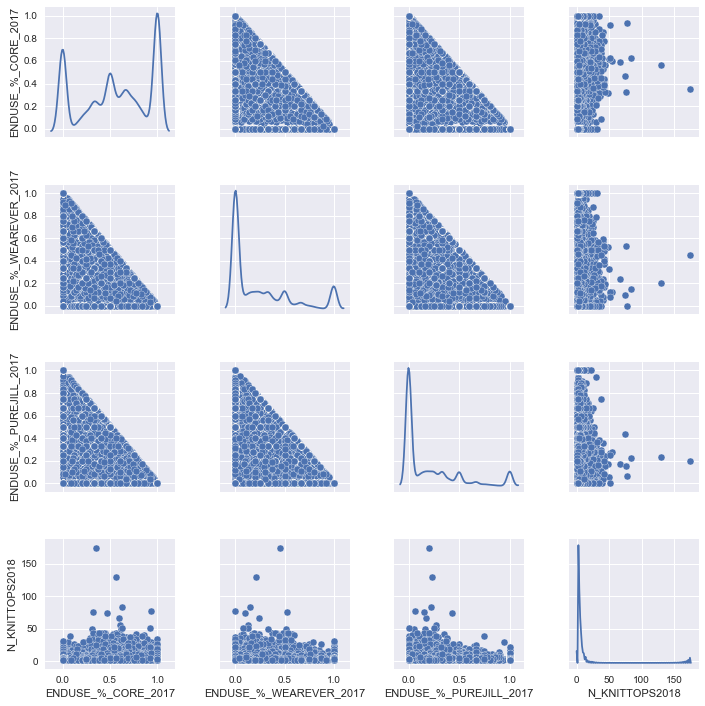

In [18]:
fts = CATEG_FTS[15:18]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,N_KNITTOPS2018
PAYTYPE_%_JJC_2017,1.000000,-0.595816,-0.355299,0.056965
PAYTYPE_%_VISA_2017,-0.595816,1.000000,-0.177761,-0.036502
PAYTYPE_%_MC_2017,-0.355299,-0.177761,1.000000,-0.012448
N_KNITTOPS2018,0.056965,-0.036502,-0.012448,1.000000


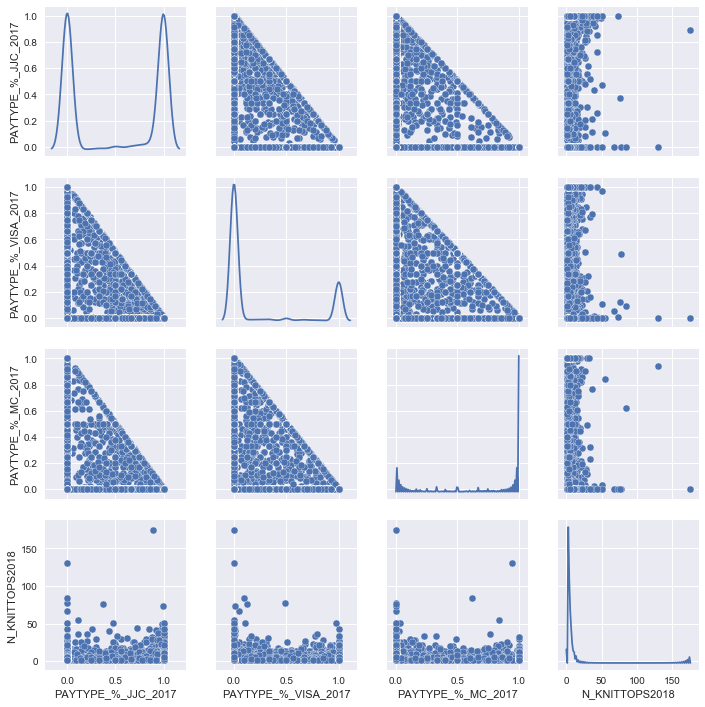

In [19]:
fts = CATEG_FTS[18:21]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,N_KNITTOPS2018
PAYTYPE_%_AMEX_2017,1.000000,-0.036491,-0.041484,-0.006261
PAYTYPE_%_DISC_2017,-0.036491,1.000000,-0.021055,-0.003813
PAYTYPE_%_DEBIT_2017,-0.041484,-0.021055,1.000000,-0.033597
N_KNITTOPS2018,-0.006261,-0.003813,-0.033597,1.000000


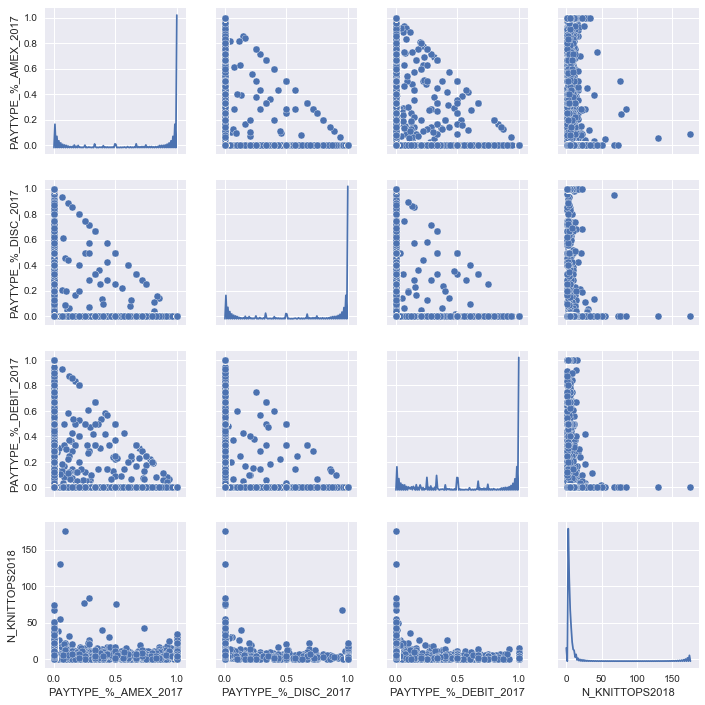

In [20]:
fts = CATEG_FTS[21:24]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,N_KNITTOPS2018
PAYTYPE_%_CASH_2017,1.000000,0.002447,-0.013985,-0.018432
PAYTYPE_%_CK_2017,0.002447,1.000000,-0.002779,-0.002048
PAYTYPE_%_OTHER_2017,-0.013985,-0.002779,1.000000,-0.023432
N_KNITTOPS2018,-0.018432,-0.002048,-0.023432,1.000000


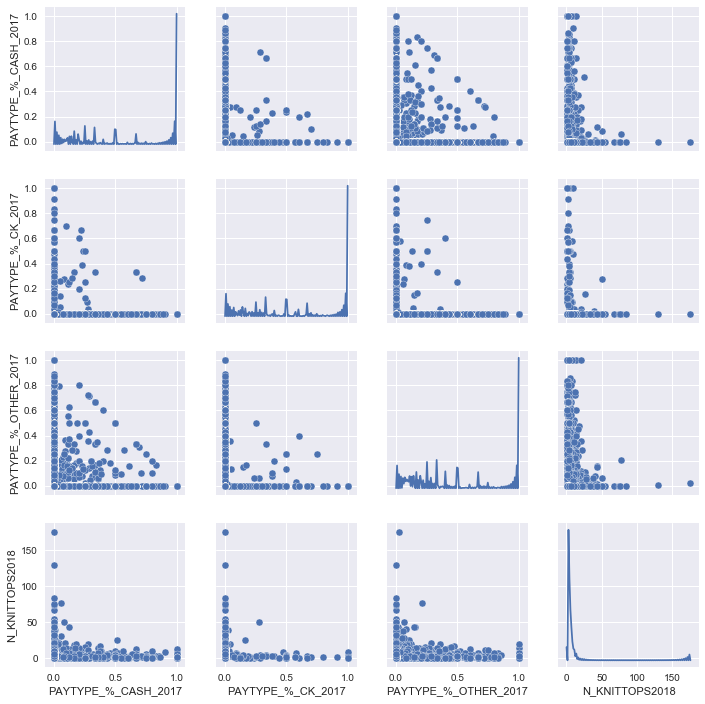

In [21]:
fts = CATEG_FTS[24:27]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_KNITTOPS2018
FABRICCATEGORY_%_COTTON/COTTONBL_2017,1.000000,-0.474229,-0.249559,0.001598
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,-0.474229,1.000000,-0.212246,-0.003095
FABRICCATEGORY_%_LINEN/LINENBL_2017,-0.249559,-0.212246,1.000000,-0.008760
N_KNITTOPS2018,0.001598,-0.003095,-0.008760,1.000000


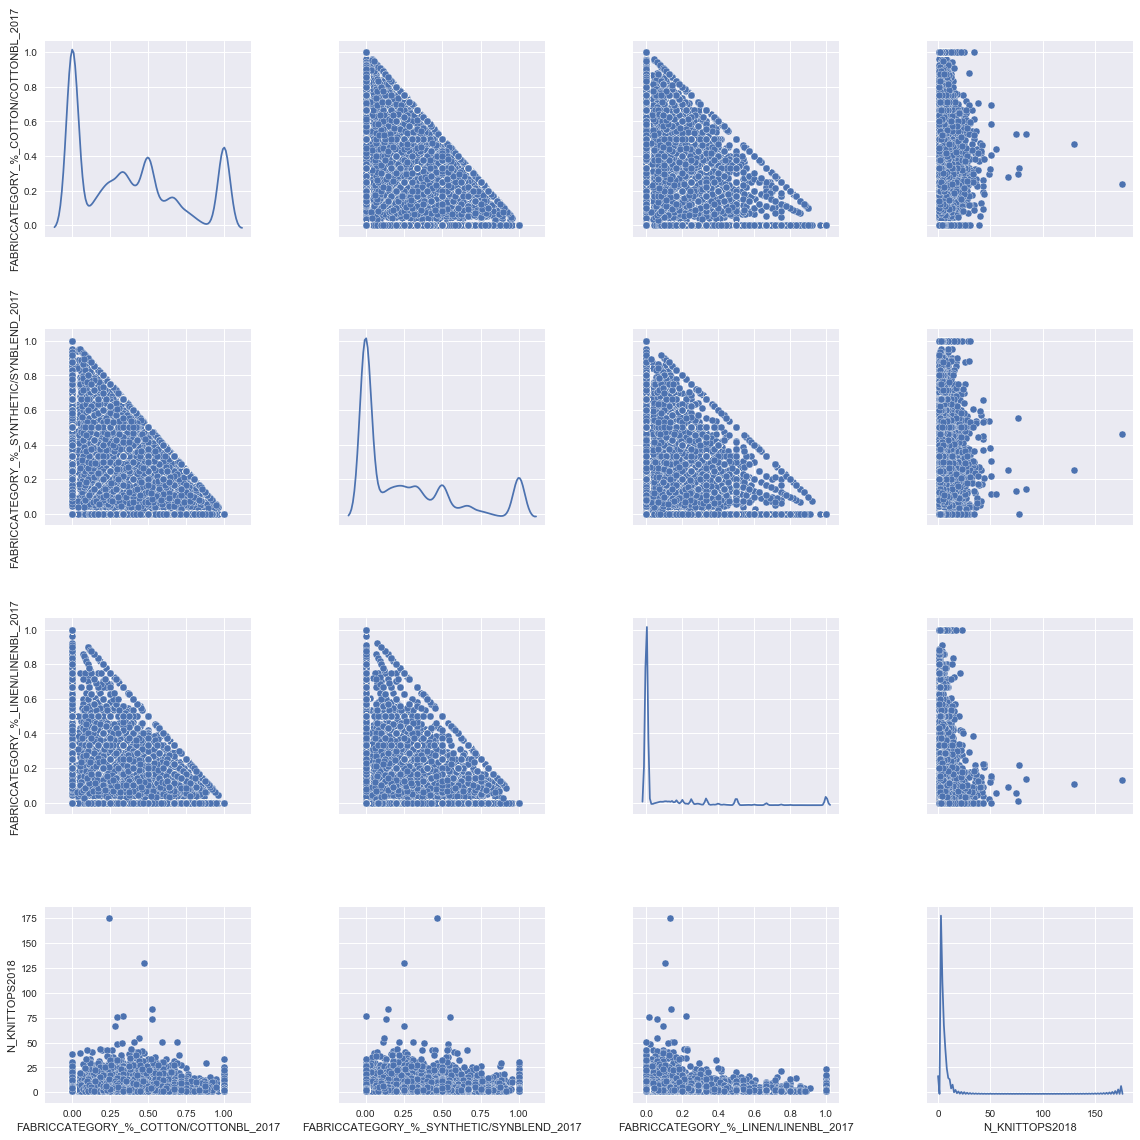

In [22]:
fts = CATEG_FTS[27:30]+['N_KNITTOPS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);